In [1]:
import kcorrect.kcorrect
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

In [2]:
at2018bsi = {'u_mag': 17.4724, 'err_u': 0.020,
           'g_mag': 15.97377, 'err_g': 0.004,
           'r_mag': 15.24271, 'err_r': 0.003,
           'i_mag': 14.84661, 'err_i': 0.003,
           'z_mag': 14.53037, 'err_z': 0.006,
            'z':  0.051}

at2018hyz = {'u_mag': 19.195, 'err_u': 0.034,
           'g_mag': 17.605, 'err_g': 0.005,
           'r_mag': 17.040, 'err_r': 0.005,
           'i_mag': 16.755, 'err_i': 0.005,
           'z_mag': 16.546, 'err_z': 0.0014,
            'z':  0.0457}


In [3]:
sdss_centers = [3543, 4770, 6231, 7625, 9134]

In [4]:
z_match = (sdss_centers[2] / sdss_centers[1])-1
z_match

0.30628930817610067

In [5]:
def mag_2_maggies(mag):
    maggie = 10**(-0.4*mag)
    return maggie

def inverse_var(dm, flux):
    return 1 / ((dm * flux * np.log(10)) / (-2.5))**2

In [6]:
kc_sdss = kcorrect.kcorrect.Kcorrect(responses = ['sdss_u0', 'sdss_g0', 'sdss_r0', 'sdss_i0', 'sdss_z0'])#,
                                     #responses_out = ['sdss_r0', 'sdss_r0', 'sdss_r0', 'sdss_r0', 'sdss_r0'])

In [7]:
redshift = at2018hyz['z']
mags = np.array([at2018hyz[k] for k in ['u_mag', 'g_mag', 'r_mag', 'i_mag', 'z_mag']])
errs = np.array([at2018hyz[k] for k in ['err_u', 'err_g', 'err_r', 'err_i', 'err_z']])
maggies, ivar = kcorrect.utils.sdss_asinh_to_maggies(mags, errs)


In [10]:
coeffs = kc_sdss.fit_coeffs(redshift=redshift, maggies=maggies, ivar = ivar)

In [11]:
len(coeffs)

5

In [12]:
k = kc_sdss.kcorrect(redshift = z_match, coeffs=coeffs)
k

array([ 1.1778961 ,  0.92272065,  0.25248041,  0.08835637, -0.02983366])

In [14]:
kc_sdss.absmag(redshift=redshift, maggies=maggies, ivar=ivar, coeffs=coeffs)

array([-17.6151119 , -19.0693749 , -19.65242706, -19.82983431, -20.07036986])

In [33]:
2.5*np.log10((1+z_match))

0.2900984305366191

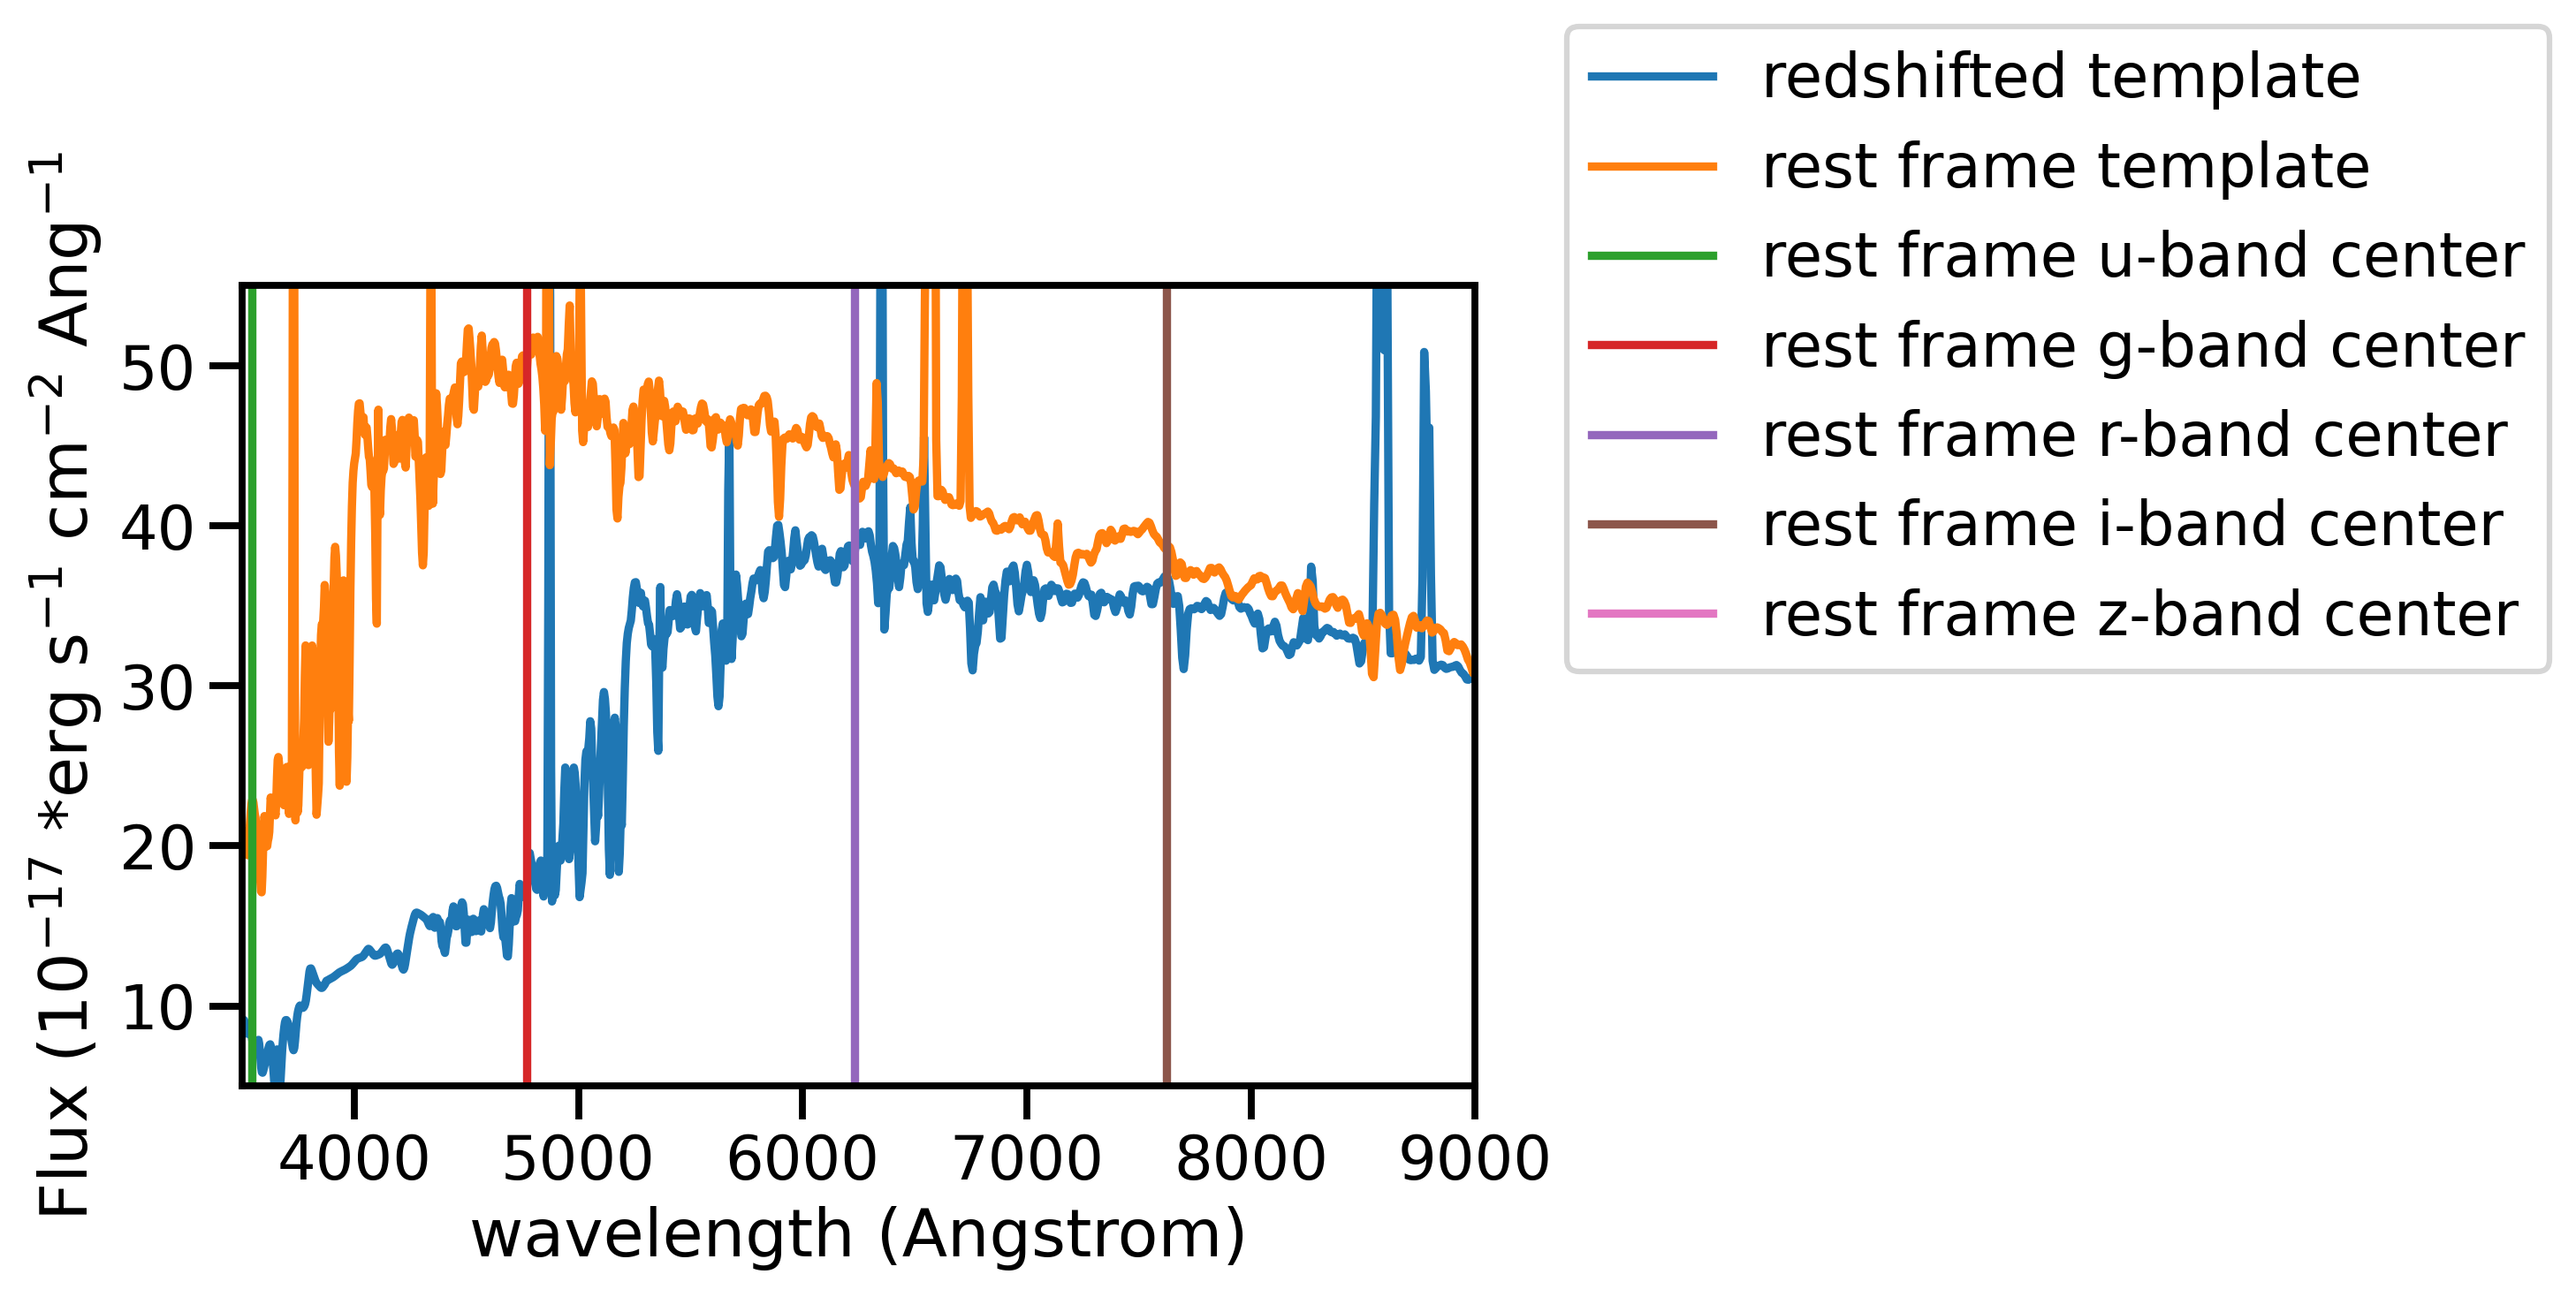

In [34]:
plt.figure(dpi = 300)
wave = kc_sdss.templates.restframe_wave * (1. + z_match)
spec = (coeffs.dot(kc_sdss.templates.restframe_flux) )  / (1. + z_match)
plt.plot(wave, spec*1e17, label = 'redshifted template')

rf_wave = kc_sdss.templates.restframe_wave #* (1. + redshift)
spec = (coeffs.dot(kc_sdss.templates.restframe_flux) )#  / (1. + redshift)
plt.plot(rf_wave, spec*1e17, label = 'rest frame template')
filts = ['u', 'g', 'r', 'i', 'z']
colors = ['C2', 'C3', 'C4', 'C5', 'C6']
for i, filt_center in enumerate(np.array([3543, 4770,6231,7625,9134])):
    plt.axvline(filt_center, label = 'rest frame {}-band center'.format(filts[i]), c = colors[i])
plt.xlabel('wavelength (Angstrom)')
plt.ylabel('Flux ($10^{-17}$ *erg s$^{-1}$ cm$^{-2}$ Ang$^{-1}$')
plt.xlim([3500, 9000])
plt.ylim([5, 55])
#plt.yscale('log')
#plt.xscale('log')
plt.legend(bbox_to_anchor = [1.05, 0.48])
plt.show()

In [35]:
np.array([3543, 4770, 6231, 7625, 9134])*(1+6)

array([24801, 33390, 43617, 53375, 63938])

In [36]:
(12900 / 7625)+ 1

2.691803278688525

In [37]:
(10600 / 9134 ) +1

2.1604992336325815

In [38]:
roman_filters = ['f062', 'f087', 
                 'f106', 'f129', 
                 'f158', 'f184', 
                 'f213', 'f146']

In [39]:
# match rest frames
kc_roman = kcorrect.kcorrect.Kcorrect(responses = ['sdss_u0', 'sdss_g0', 'sdss_r0', 'sdss_i0', 'sdss_z0'],
                                       responses_out= ['Roman_F062'],
                                       responses_map = ['sdss_r0'],
                                     redshift_range=[0.1, 6])
kc_roman_106 = kcorrect.kcorrect.Kcorrect(responses = ['sdss_u0', 'sdss_g0', 'sdss_r0', 'sdss_i0', 'sdss_z0'],
                                       responses_out= ['Roman_F184'],
                                       responses_map = ['sdss_g0'],
                                     redshift_range=[0.1, 6])
# kc_roman_wave = kcorrect.kcorrect.Kcorrect(responses = ['sdss_u0', 'sdss_g0', 'sdss_r0', 'sdss_i0', 'sdss_z0'],
#                                        responses_out= ['Roman_F062_wave', 'Roman_F087_wave'],
#                                        responses_map = ['sdss_r0', 'sdss_z0'])
# kc_roman_dwave = kcorrect.kcorrect.Kcorrect(responses = ['sdss_u0', 'sdss_g0', 'sdss_r0', 'sdss_i0', 'sdss_z0'],
#                                        responses_out= ['Roman_F062_dwave', 'Roman_F087_dwave'],
#                                        responses_map = ['sdss_r0', 'sdss_z0'])
# match redshift 5
# kc_roman_2 = kcorrect.kcorrect.Kcorrect(responses = ['sdss_u0', 'sdss_g0', 'sdss_r0', 'sdss_i0', 'sdss_z0'],
#                                        responses_out = ['Roman_F2'])

In [10]:
redshift, maggies, ivar

(0.0457,
 array([  2.09884714e-08,   9.07820734e-08,   1.52756286e-07,
          1.98609541e-07,   2.40766326e-07], dtype=float32),
 array([  1.22710918e+19,   3.03345890e+19,   1.07137326e+19,
          6.33779778e+18,   5.50067547e+19], dtype=float32))

In [22]:
#coeffs_sdss = kc_sdss.fit_coeffs(redshift=redshift, maggies=maggies, ivar = ivar)
coeffs_roman = kc_roman.fit_coeffs(redshift=2.69, maggies=maggies, ivar = ivar)
coeffs_roman_106 = kc_roman_106.fit_coeffs(redshift=2.69, maggies=maggies, ivar = ivar)
# coeffs_roman_dwave = kc_roman_dwave.fit_coeffs(redshift=redshift, maggies=maggies, ivar = ivar)

In [23]:
print(coeffs_roman_106)
print(coeffs_roman)

[  0.00000000e+00   7.24237719e-09   7.13076336e-06   0.00000000e+00
   4.98855651e-06]
[  0.00000000e+00   7.24237719e-09   7.13076336e-06   0.00000000e+00
   4.98855651e-06]


In [29]:
-2.5*np.log10(2)

-0.75257498915995302

In [35]:
print(kc_sdss.kcorrect(redshift = 2.0, coeffs=coeffs_sdss))

[ 4.97237023  3.77289116  2.97135039  2.87451027  2.08706831]


In [17]:
print(kc_sdss.kcorrect(redshift = 1.0, coeffs=coeffs_sdss))
print(kc_roman.kcorrect(redshift = 1.0, coeffs=coeffs_roman))
print(kc_roman_wave.kcorrect(redshift = 1.0, coeffs=coeffs_roman_wave))
print(kc_roman_dwave.kcorrect(redshift = 1.0, coeffs=coeffs_roman_dwave))

[ 1.98486674  2.65199339  1.89795208  1.05571649  0.36322313]
[ 0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.]


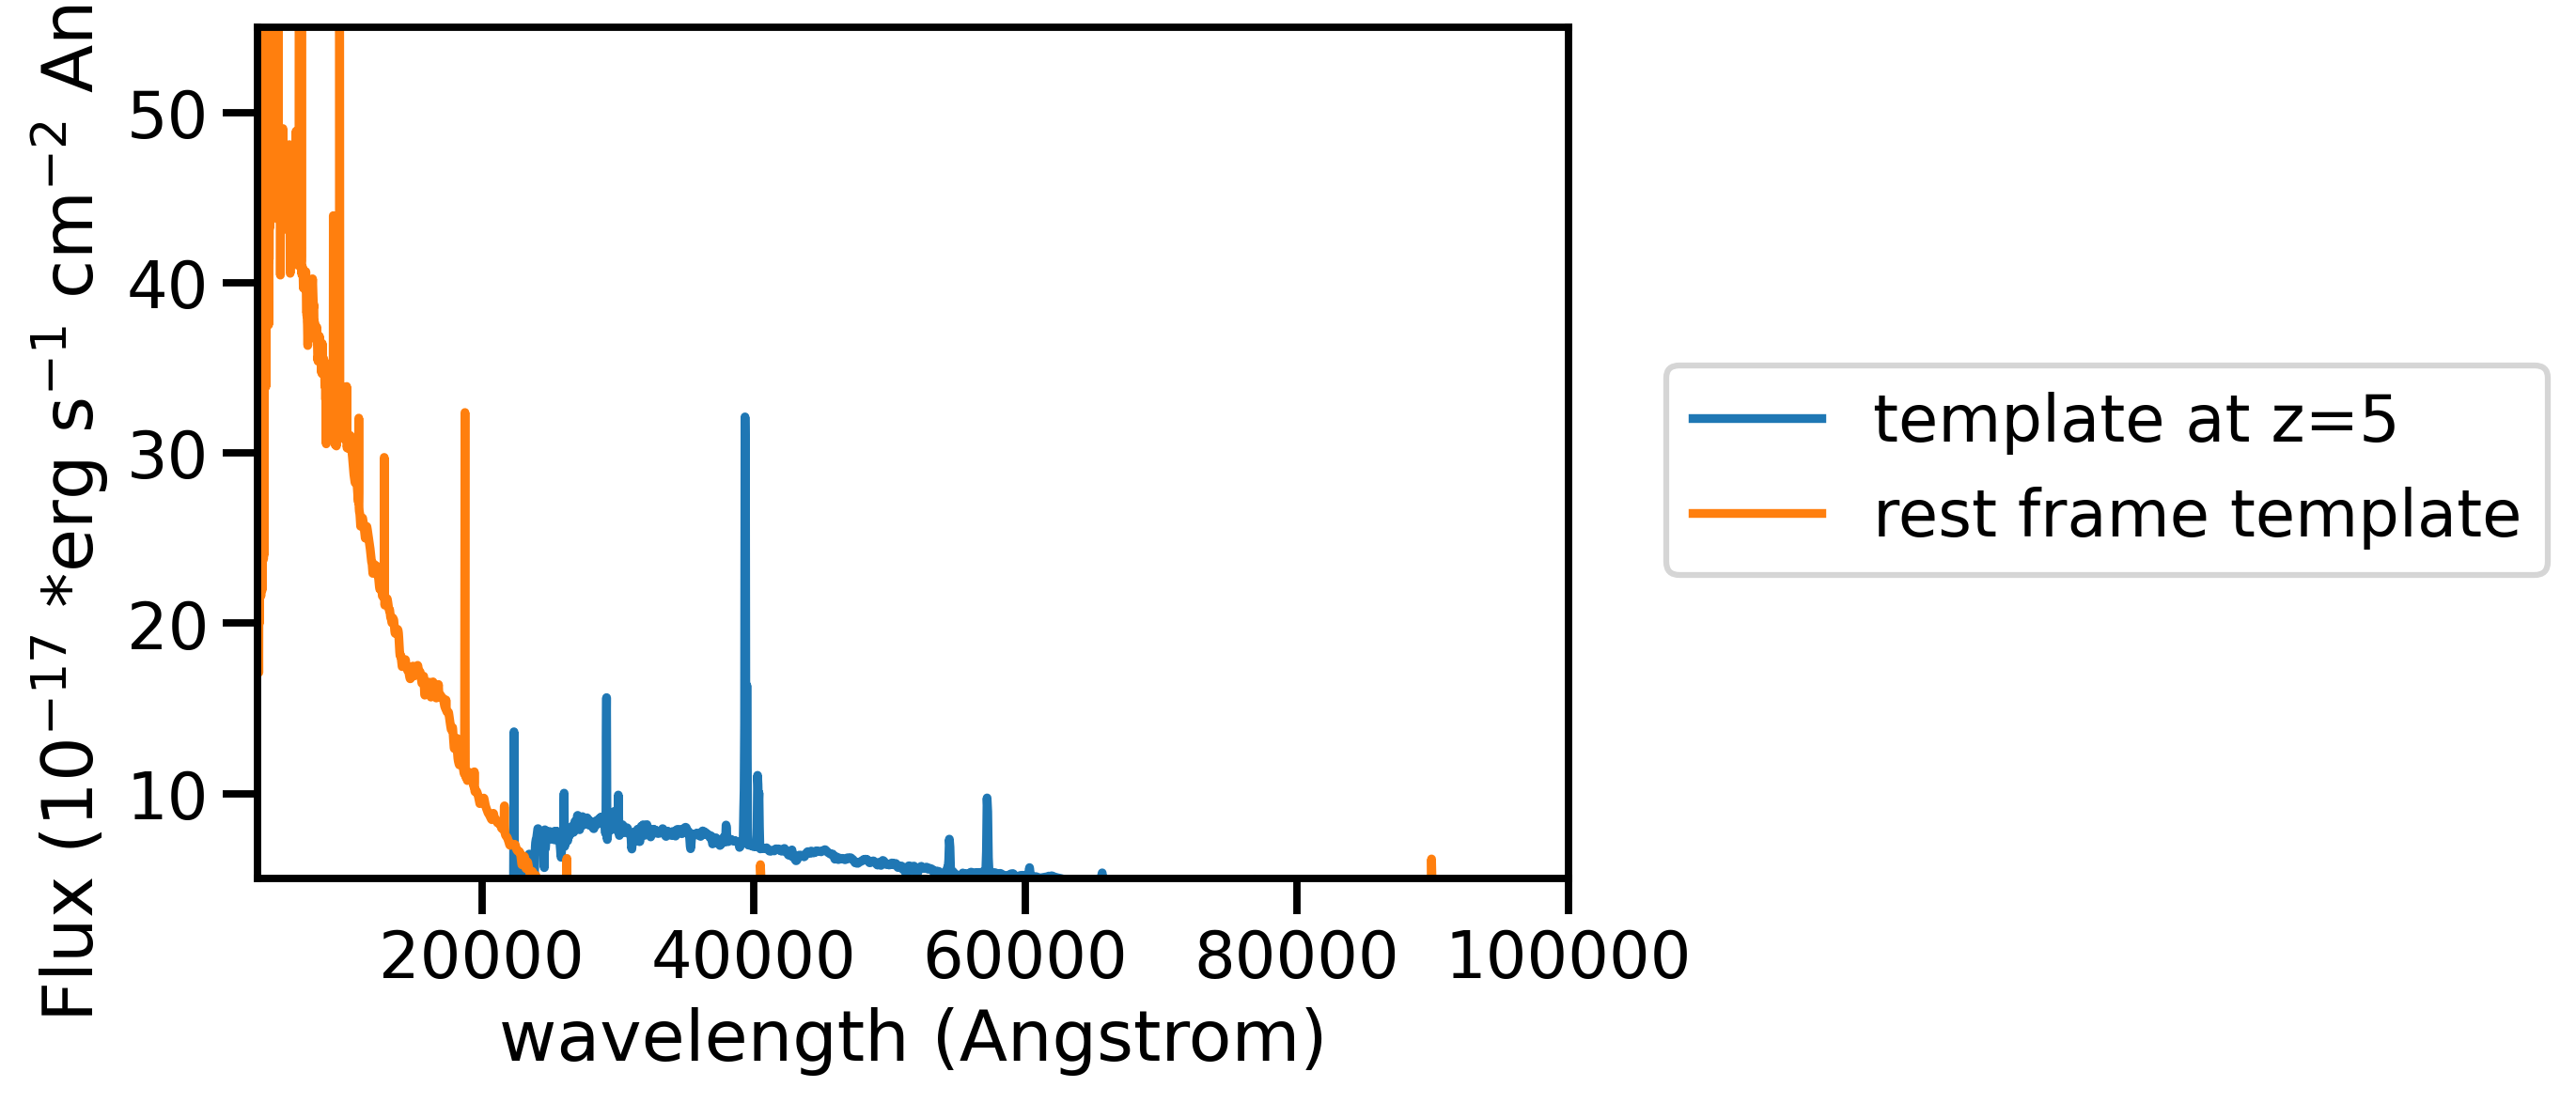

In [40]:
plt.figure(dpi = 300)
wave = kc_sdss.templates.restframe_wave * (1. + 5)
spec = (coeffs.dot(kc_sdss.templates.restframe_flux) )  / (1. + 5)
plt.plot(wave, spec*1e17, label = 'template at z=5')

rf_wave = kc_sdss.templates.restframe_wave #* (1. + redshift)
spec = (coeffs.dot(kc_sdss.templates.restframe_flux) )#  / (1. + redshift)
plt.plot(rf_wave, spec*1e17, label = 'rest frame template')
filts = ['u', 'g', 'r', 'i', 'z']
colors = ['C2', 'C3', 'C4', 'C5', 'C6']
for i, filt_center in enumerate(np.array([3543, 4770,6231,7625,9134])):
    plt.axvline(filt_center, label = 'rest frame {}-band center'.format(filts[i]), c = colors[i])
plt.xlabel('wavelength (Angstrom)')
plt.ylabel('Flux ($10^{-17}$ *erg s$^{-1}$ cm$^{-2}$ Ang$^{-1}$')
plt.xlim([3500, 100000])
plt.ylim([5, 55])
#plt.yscale('log')
#plt.xscale('log')
plt.legend(bbox_to_anchor = [1.05, 0.48])
plt.show()

In [12]:
kc_sdss = kcorrect.kcorrect.Kcorrect(responses = ['sdss_u0', 'sdss_g0', 'sdss_r0', 'sdss_i0', 'sdss_z0'],
                                    redshift_range=[0.,6.])

In [13]:
redshift = at2018hyz['z']
mags = np.array([at2018hyz[k] for k in ['u_mag', 'g_mag', 'r_mag', 'i_mag', 'z_mag']])
errs = np.array([at2018hyz[k] for k in ['err_u', 'err_g', 'err_r', 'err_i', 'err_z']])
maggies, ivar = kcorrect.utils.sdss_asinh_to_maggies(mags, errs)
coeffs = kc_sdss.fit_coeffs(redshift=redshift, maggies=maggies, ivar = ivar)

In [14]:
coeffs

array([  1.95404744e-06,   0.00000000e+00,   2.87297404e-06,
         2.13050701e-05,   0.00000000e+00])

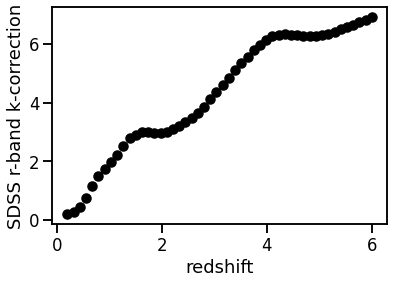

In [16]:
for z in np.linspace(0.2, 6, 50):
    ks = kc_sdss.kcorrect(redshift = z, coeffs=coeffs)
    k_r = ks[2]
    plt.scatter(z, k_r, c = 'k')

plt.xlabel('redshift')
plt.ylabel('SDSS r-band k-correction')
plt.show()

0.182092163933
0.261736650677
0.439912704811
0.748774536273
1.15897438969
1.50003104002
1.73150005321
1.96269775705
2.22034222335
2.52322086348
2.79665959221
2.90468998452
2.99713112682
2.9820136514
2.9558313236
2.96285220297
3.0142161619
3.08781486563
3.19390985256
3.32673654358
3.47455105958
3.64214643229
3.86741600263
4.11548745934
4.36444040549
4.58733332001
4.85457020764
5.11254530057
5.34566042595
5.57745276983
5.79451536829
5.97520113501
6.13866653229
6.2701888618
6.32670190968
6.33813684018
6.32925648161
6.30208346911
6.27920513678
6.26910983837
6.27376613524
6.30027556536
6.35295321736
6.42042140751
6.50198057217
6.58789824836
6.66656489568
6.75506487052
6.84192379547
6.9363144474


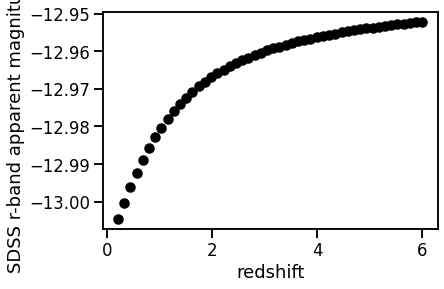

In [21]:
from astropy.cosmology import WMAP9 as cosmo

for z in np.linspace(0.2, 6, 50):
    ks = kc_sdss.kcorrect(redshift = z, coeffs=coeffs)
    k_r = ks[2]
    luminosity_distance = cosmo.luminosity_distance(z).value
    dist_mod = kc_sdss.absmag(maggies, ivar, z, coeffs)[2] + 5*np.log10(luminosity_distance/(10))
    plt.scatter(z, dist_mod + k_r, c = 'k')

plt.xlabel('redshift')
plt.ylabel('SDSS r-band apparent magnitude')
plt.show()

In [ ]:
# First do k-correct for the r band, plot r band mags of tdes and galaxies
# Write my own k correction code